# Taller 5 - Morfología matemática

# Punto 2 - Gradiente morfológico

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

### 2.0 Inicialización

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure


### 2.1 Cargado y visualización de la imagen

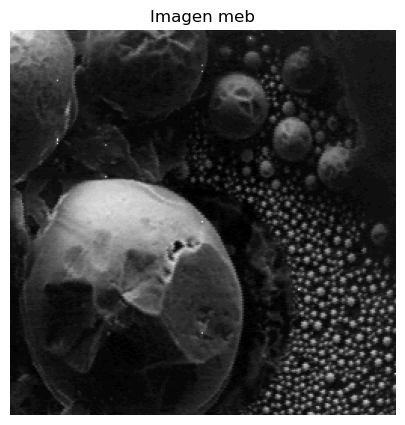

In [14]:
ruta_meb = './images/meb.png'
img_meb = cv2.imread(ruta_meb, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_meb, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen meb')
ax.axis('off')
plt.show()

### 2.2 Máscara cuadrada de 3x3, calcule el gradiente morfológico de esta imagen.



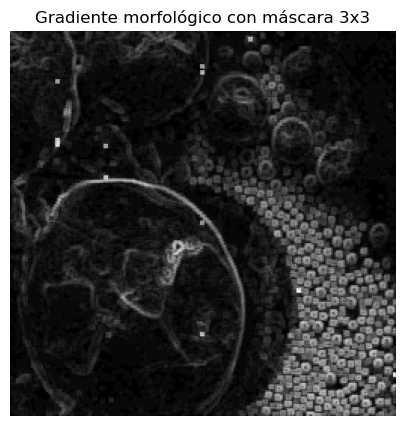

In [24]:
mgimage = morphological_gradient(img_meb, size=(3,3))

mgimage = exposure.rescale_intensity(mgimage, in_range=(np.min(mgimage), np.max(mgimage)), out_range=(0, 255)).astype(np.uint8)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(mgimage, cmap='gray', vmin=0, vmax=255)
ax.set_title('Gradiente morfológico con máscara 3x3')
ax.axis('off')
plt.show()


### 2.2 Imagen de la norma del gradiente de la imagen meb.png con el operador de Sobel

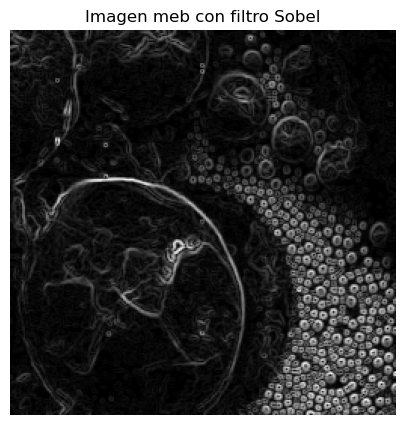

In [26]:
img_meb_sh = sobel_h(img_meb)
img_meb_sv = sobel_v(img_meb)
img_meb_norma = np.sqrt(img_meb_sh**2 + img_meb_sv**2)

img_meb_norma = exposure.rescale_intensity(img_meb_norma, in_range=(np.min(img_meb_norma), np.max(img_meb_norma)), out_range=(0, 255)).astype(np.uint8)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_meb_norma, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen meb con filtro Sobel')
ax.axis('off')
plt.show()


**Comparación de los resultados obtenidos (gradiente morfológico vs. norma del gradiente con Sobel)**


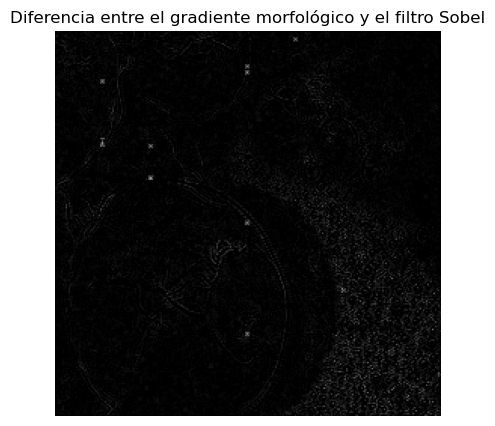

In [27]:
dif = cv2.subtract(mgimage, img_meb_norma)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dif, cmap='gray', vmin=0, vmax=255)
ax.set_title('Diferencia entre el gradiente morfológico y el filtro Sobel')
ax.axis('off')
plt.show()

A simple vista, ambos resultados son similares, pero el gradiente morfológico se percibe un poco más brillante.

Al restar las dos imágenes, la mayor parte queda negra, lo que indica que comparten los mismos valores en muchas regiones. Las diferencias aparecen en tonos de gris oscuro, lo que sugiere que las variaciones son pequeñas.

Esto demuestra que el gradiente morfológico es una muy buena aproximación del gradiente de Sobel, aunque con ligeras diferencias en intensidad y detalles.